Introducción al proyecto. 
Los videos juegos actualmente estan intrínsecos en la vida de cada joven y adulto contemporaneo. En este caso vamos a realizar el análisis de datos en Ice, la tienda online líder en la venta de videojuegos a nivel mundial. En este apasionante viaje, nos sumergiremos en un vasto océano de datos que se remontan a 2016, mientras nos preparamos para navegar hacia el futuro en una campaña publicitaria épica para el año 2017.

Imagínense por un momento en diciembre de 2016, cuando las posibilidades son tan vastas como los universos virtuales que habitamos. En este momento crucial, nuestro objetivo es desentrañar los misterios y descubrir los patrones ocultos que determinarán el éxito de un videojuego. ¿Qué factores influyen en la recepción de los jugadores? ¿Qué elementos distinguen a un juego prometedor de uno que puede quedarse en el olvido?

Con acceso a una riqueza de datos, desde las reseñas de usuarios y expertos hasta los géneros, plataformas y las históricas ventas de juegos, nos enfrentamos a un desafío apasionante. Además, contamos con un recurso invaluable: la clasificación ESRB (Entertainment Software Rating Board), que proporciona una guía sobre el contenido de cada juego y su adecuación para diferentes grupos de edad.

Nuestra misión es clara: identificar los hilos invisibles que conectan el éxito de un juego con sus características intrínsecas y las preferencias del público. Este análisis profundo no solo nos permitirá reconocer proyectos con un potencial excepcional, sino que también nos guiará en la planificación de estrategias publicitarias efectivas que llegarán a los corazones y las mentes de los jugadores de todo el mundo.

Con nuestro ingenio analítico y una visión audaz del futuro, nos embarcamos en este viaje hacia la comprensión y la innovación en el fascinante mundo de los videojuegos. ¡El horizonte está lleno de posibilidades, y juntos, descubriremos los secretos que aguardan en los datos de Ice!.

Objetivos.

1)Identificar características clave de los videojuegos exitoso. Analizar los datos para identificar qué características, como género, plataforma, calificación ESRB, etc., están más correlacionadas con el éxito de un videojuego, medido por las ventas o las calificaciones de los usuarios.

2)Predecir el éxito de los nuevos lanzamientos. A través de modelos estadísticos podemos tener una visión de que juegos serían los más exitosos en un futuro inmediato.

Etapas para desarrollar este análisis:

I)  Adquisición de datos. Utilizares una data CSV. Manejare las bibliotecas pandas, matplotlib, seaborn, etc.
II) Preparación de datos. En esta etapa realizaré la limpieza de datos, manejaré valores ausentes de la forma más adecuada y realizare la conversión de datps donde se requiera.
III)Exploración de datos. Aqui es necesario comprender la estructura de los datos, su distribución, relaciones entre variables, etc.
IV) Análisis y modelado de datos. Aplicar técnicas de análisis estadísticas prara responder preguntas o hacer predicciones. 



In [842]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt
from scipy import stats as st
from math import factorial

In [843]:
df_games = pd.read_csv("games.csv")

In [844]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [845]:
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [846]:
valores_ausentes = df_games.isna().sum()
print(valores_ausentes)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [847]:
df_games.columns = df_games.columns.str.lower()

In [848]:
posicion = 3
df_games.insert(posicion, "year_datetime", pd.to_datetime(df_games["year_of_release"], format='%Y'))

In [849]:

df_games['user_score'] = df_games['user_score'].replace('tbd', -1)
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'] = df_games['user_score'].astype(float)


In [850]:
df_games["user_score"].isna().sum()

6701

In [851]:
median_user_score = df_games["user_score"].median()
print(median_user_score)

6.9


In [852]:
df_games["user_score"] = df_games["user_score"].fillna(median_user_score)

In [853]:
df_games["critic_score"].isna().sum()

8578

In [854]:
median_critic_score = df_games["critic_score"].median()
print(median_critic_score)

71.0


In [855]:
df_games["critic_score"] = df_games["critic_score"].fillna(median_critic_score)

In [856]:
df_games["genre"].isna().sum()

2

In [857]:
df_games["genre"] = df_games["genre"].fillna("Unkonw")

In [858]:
df_games["name"].isna().sum()

2

In [859]:
df_games["name"] = df_games["name"].fillna("Unknown")

In [860]:
df_games["total_sales"] = df_games.apply(lambda row: row['na_sales'] + row['eu_sales'] + row["jp_sales"] + row["other_sales"], axis=1)
df_games.head(2)

,name,platform,year_of_release,year_datetime,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,1985-01-01,Platform,29.08,3.58,6.81,0.77,71.0,6.9,NaN,40.24


 Primeramente coloqué todos los nombres de las columnas en minúsculas para que sea consistente en la presentación.  Agregué una columna denominada "year_datetime" y la convertí en fecha. Mantengo la columna anterior para no cambiar el dataframe original  y con esta nueva columna realizar los cálculos necesarios. En el caso de la columna "user_score" que tiene una calificación tbd, le asigné un valor -1. Asi represento los datos desconocidos y puedo manejar mejor la columna en el caso de futura utilización. La columna "critic_Score" la rellene con la mediana para no alterar significativamente los resultados. En el caso de las columnas "name" y "genre", existian algunos valores ausente por lo que lo rellené con "Unknown.  En el caso de "year_of_release" es posible que algunos juegos no hayan salido al mercado en los mismos períodos de otros. En el caso de "critic_score" y "user_score" es posible que los juegos sean muy recientes y no hayanm sido evaluados por los críticos y usuarios, falta de participación de los usuarios para "user_score" o políticas restrictivas para ciertos juegos de violencia("critic_score").      

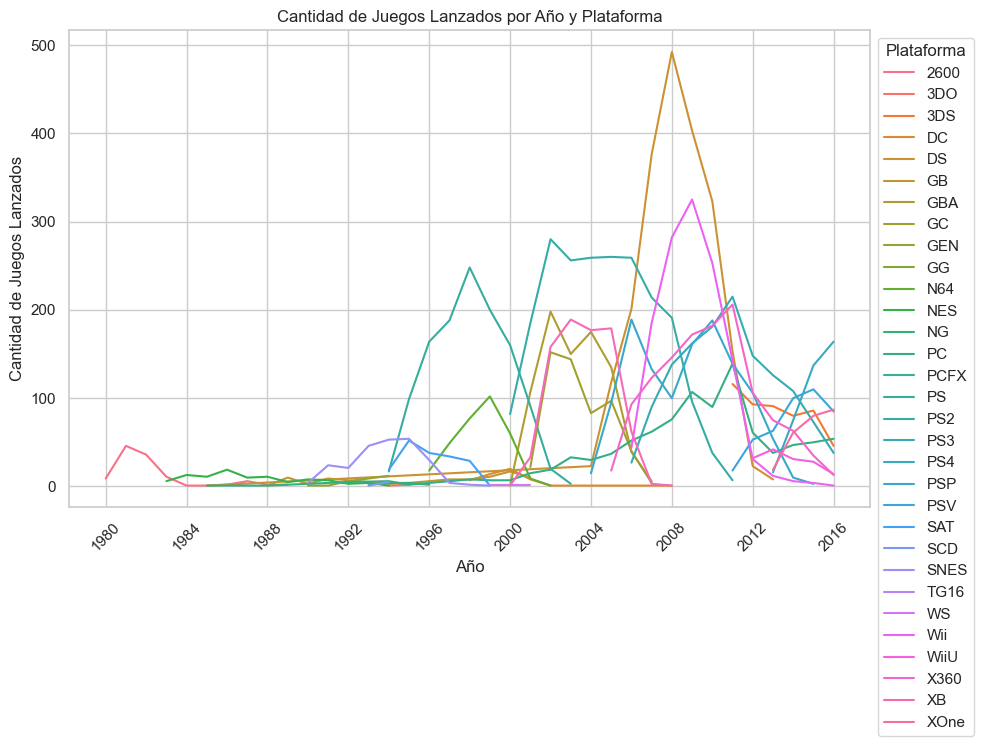

In [861]:
conteo_por_año = df_games.groupby(["platform", "year_datetime"]).size().reset_index(name="conteo")

plt.figure(figsize=(10, 7))  
sns.lineplot(data=conteo_por_año, x="year_datetime", y="conteo", hue="platform")

plt.legend(title="Plataforma", loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.title("Cantidad de Juegos Lanzados por Año y Plataforma")
plt.xlabel("Año")
plt.ylabel("Cantidad de Juegos Lanzados")

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

### Cantidad de juegos lanzados por año y plataforma.

In [862]:
df_filtered = df_games[df_games['year_of_release'] >= 2012]

umbral_popularidad = df_filtered['total_sales'].sum() * 0.05  # plataformas que representan al menos el 5% de las ventas totales

In [863]:
plataformas_populares = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
plataformas_populares = plataformas_populares[plataformas_populares >= umbral_popularidad].index
plataformas_populares

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC',
       '3DS', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU'],
      dtype='object', name='platform')

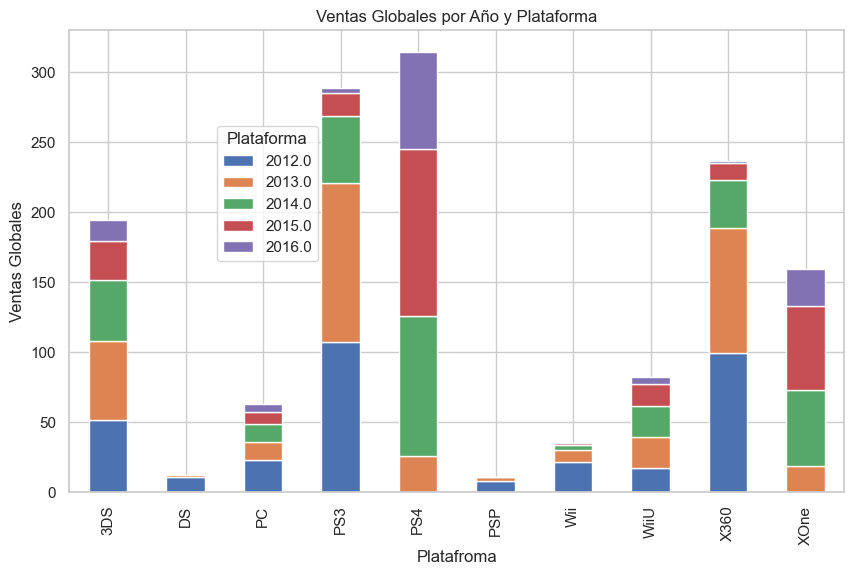

In [864]:
df_top_plataformas = df_filtered[df_filtered['platform'].isin(plataformas_populares)]

ventas_por_año = df_top_plataformas.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

ventas_por_año.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ventas Globales por Año y Plataforma')
plt.xlabel('Platafroma')
plt.ylabel('Ventas Globales')
plt.legend(title='Plataforma', loc=(0.19, 0.5 ))
plt.show()

Consideré que un 5% sobre las ventas totales a partir del año 2012 es una buena práctica para construir una distribución y mostrar el gráfico correspondiente.

In [865]:
# plataformaas sin ventas
plataformas_sin_ventas = df_games[df_games.groupby('platform')['total_sales'].transform('sum') == 0]['platform'].unique()

if len(plataformas_sin_ventas) > 0:
    print("Plataformas sin ventas:")
    for plataforma in plataformas_sin_ventas:
        print(plataforma)
else:
    print("No hay plataformas sin ventas.")

No hay plataformas sin ventas.


In [866]:
platform_lifetime = df_games.groupby("platform")["year_of_release"].agg(["min","max"])
platform_lifetime["duration"] = platform_lifetime["max"] - platform_lifetime ["min"]                                
platform_lifetime = platform_lifetime.sort_values(by="duration", ascending=False)
platform_lifetime.head(5)                                   

,min,max,duration
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0


In [867]:
avg_appearance_duration = platform_lifetime["duration"].mean()
print("Tiempo promedio entre la aparición y desaparición de una plataforma:", avg_appearance_duration)

Tiempo promedio entre la aparición y desaparición de una plataforma: 7.612903225806452


In [868]:
df_games_filtered = df_games[df_games["year_of_release"] > 2012]

El análisis lo voy a realizar con los últimos cinco años, es decir, desde 2012 hasta 2016. Son valores bastante representativos y no muy distantes de la realidad de los videojuegos.

In [869]:
df_games_filtered.head()

,name,platform,year_of_release,year_datetime,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,2015-01-01,Shooter,6.03,5.86,0.36,2.38,71.0,6.9,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,71.0,6.9,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [870]:
f_games_filtered_desc = df_games_filtered.groupby("platform")["total_sales"].max()

In [871]:
f_games_filtered_desc = f_games_filtered_desc.sort_values(ascending=False)

# Mostrar los resultados
print(f_games_filtered_desc)

platform
PS3     21.05
X360    16.27
PS4     14.63
3DS     14.60
XOne     7.39
WiiU     7.09
Wii      3.58
PC       3.05
PSV      1.96
DS       0.51
PSP      0.24
Name: total_sales, dtype: float64


Las plataformas líderes en ventas son: Wii, X360, PS3, DS, 3DS, PS4. 

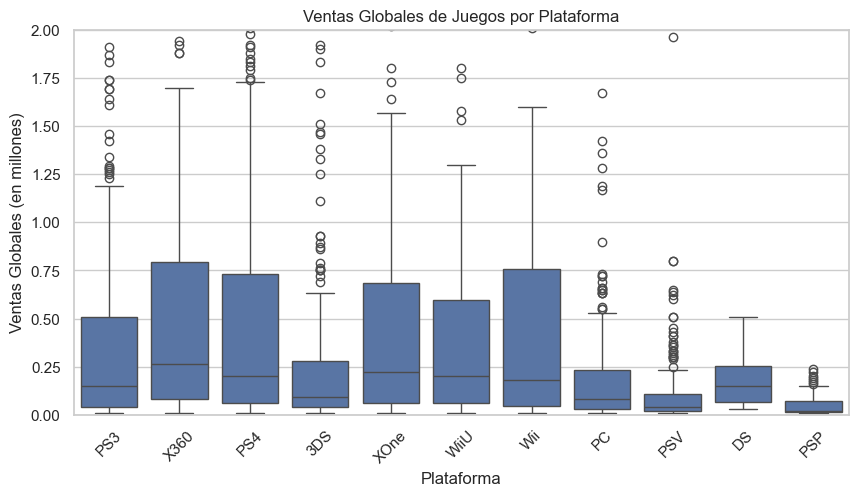

In [872]:
plt.figure(figsize=(10, 5))  

sns.set(style="whitegrid")

sns.boxplot(data=df_games_filtered, x='platform', y='total_sales')

plt.title('Ventas Globales de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.ylim(0,2.0)
plt.show()

In [873]:
media_ventas_por_plataforma = df_games_filtered.groupby('platform')['total_sales'].mean()
media_ventas_por_plataforma_ordenada = media_ventas_por_plataforma.sort_values(ascending=False)
print(media_ventas_por_plataforma_ordenada)

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64


La diferencia de ventas no son tan significativas. Las plataforma que más resaltan análizando el diagrama de caja son: PS3, WiiU, X360, PS4, GBA y Xone. En cuanto a la media, si observamos el diagrama y el cálculo de de la media para cada plataforma, podemos concluir que hay un primer bloque que no tiene una diferencia muy significativa( desde X360 hasta Wiiu).     

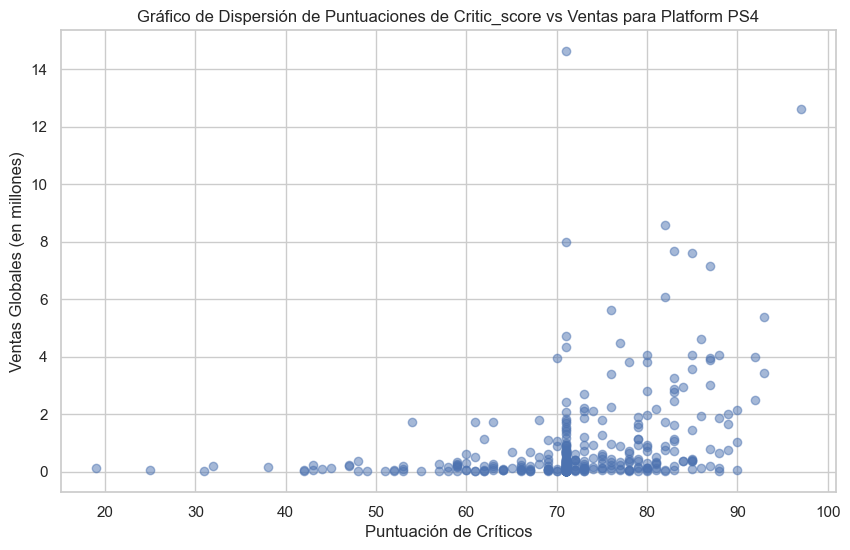

Correlación entre puntuaciones de critic_score y ventas: 0.3387064530024633


In [874]:
plt.figure(figsize=(10, 6))
df_filtered_by_platform_PS4 = df_games_filtered[df_games_filtered['platform'] == 'PS4']
plt.scatter(df_filtered_by_platform_PS4['critic_score'], df_filtered_by_platform_PS4['total_sales'], alpha=0.5)
plt.title('Gráfico de Dispersión de Puntuaciones de Critic_score vs Ventas para Platform PS4')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(True)
plt.show()

# Calcular la correlación entre las puntuaciones de critic_score y las ventas
correlacion = df_filtered_by_platform_PS4['critic_score'].corr(df_filtered_by_platform_PS4['total_sales'])
print("Correlación entre puntuaciones de critic_score y ventas:", correlacion)

La correlación es positiva moderada, es decir que mientras aumentan las ventas las criticas de lo usuarios tambien aumentan. Sin embargo esto no implica causalidad, es decir que una no causa la otra. Se necesita más análisis para determinar el porque de este comportamiento . 

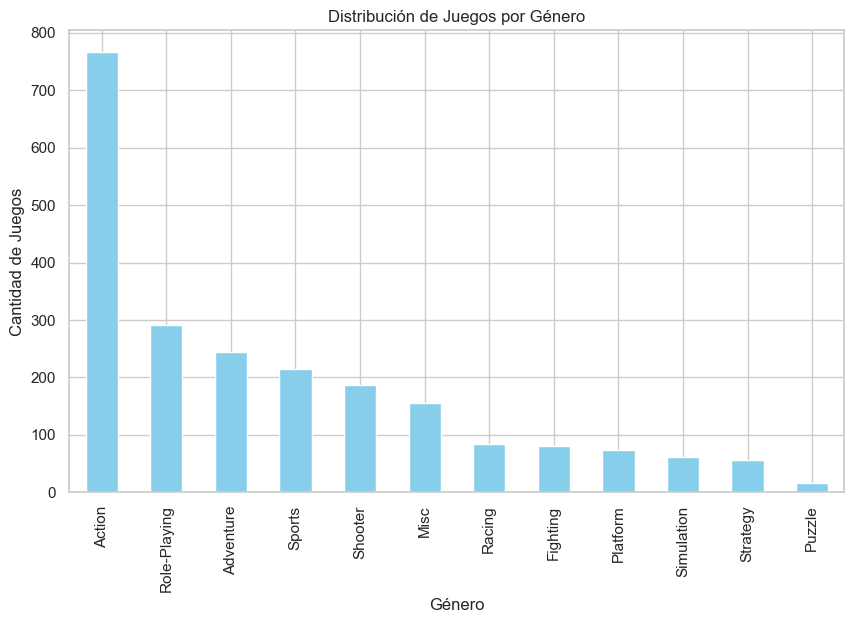

In [875]:
genre_counts = df_games_filtered['genre'].value_counts()

genre_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')

# Mostrar el gráfico
plt.show()

Los géneros más rentables son los considerados de acción (Action, Misc, Spor, Adventure) de acuerdo al análisis de este gráfico de barra.

In [876]:
df_filtered_by_region_na = df_games_filtered[["name", "platform", "year_datetime", "genre", "critic_score", "user_score", "rating","na_sales"]]
df_filtered_by_region_eu = df_games_filtered[["name", "platform", "year_datetime","genre", "critic_score", "user_score", "rating","eu_sales"]]
df_filtered_by_region_jp = df_games_filtered[["name", "platform", "year_datetime", "genre", "critic_score", "user_score", "rating","jp_sales"]]

In [877]:
ventas_por_plataforma_na_sales = df_filtered_by_region_na.groupby('platform')['na_sales'].sum()

# Seleccionar las cinco plataformas principales
plataformas_principales_na_sales = ventas_por_plataforma_na_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_platforms_na_sales = df_filtered_by_region_na[df_filtered_by_region_na['platform'].isin(plataformas_principales_na_sales)]

df_top_platforms_na_sales.head()

,name,platform,year_datetime,genre,critic_score,user_score,rating,na_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,7.02
23,Grand Theft Auto V,X360,2013-01-01,Action,97.0,8.1,M,9.66
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,6.03
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,5.28
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,3.96


In [878]:
df_total_sales_na = df_top_platforms_na_sales.head(5)
df_total_sales_na = df_total_sales_na["na_sales"].sum()
print("Total ventas en la región Norteamericana de cinco plataformas principales:",df_total_sales_na)

Total ventas en la región Norteamericana de cinco plataformas principales: 31.950000000000003


In [879]:
ventas_por_plataforma_eu_sales = df_filtered_by_region_eu.groupby('platform')['eu_sales'].sum()

# Seleccionar las cinco plataformas principales
plataformas_principales_eu_sales = ventas_por_plataforma_eu_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_platforms_eu_sales = df_filtered_by_region_eu[df_filtered_by_region_eu['platform'].isin(plataformas_principales_eu_sales)]

df_top_platforms_eu_sales.head(5)

,name,platform,year_datetime,genre,critic_score,user_score,rating,eu_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,9.09
23,Grand Theft Auto V,X360,2013-01-01,Action,97.0,8.1,M,5.14
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,5.86
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,4.19
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,6.31


In [880]:
df_total_sales_eu = df_top_platforms_eu_sales.head(5)
df_total_sales_eu = df_total_sales_eu["eu_sales"].sum()
print("Total ventas el la región Europea de cinco plataformas principales:",df_total_sales_eu)

Total ventas el la región Europea de cinco plataformas principales: 30.59


In [881]:
ventas_por_plataforma_jp_sales = df_filtered_by_region_jp.groupby('platform')['jp_sales'].sum()

# Seleccionar las cinco plataformas principales
plataformas_principales_jp_sales = ventas_por_plataforma_jp_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_platforms_jp_sales = df_filtered_by_region_jp[df_filtered_by_region_jp['platform'].isin(plataformas_principales_jp_sales)]

df_top_platforms_jp_sales.head(5)

,name,platform,year_datetime,genre,critic_score,user_score,rating,jp_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,0.98
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,0.36
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,4.35
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,0.38
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,71.0,6.9,NaN,3.10


In [882]:
df_total_sales_jp = df_top_platforms_jp_sales.head(5)
df_total_sales_jp = df_total_sales_jp["jp_sales"].sum()
print("Total ventas en la región Asiaticas_Japonesa de cinco plataformas principales:",df_total_sales_jp)

Total ventas en la región Asiaticas_Japonesa de cinco plataformas principales: 9.17


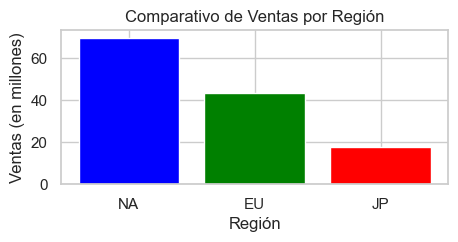

In [883]:
sales_data = {'NA': 69.65, 'EU': 43.55, 'JP': 17.9}

# Extraer los nombres de las regiones y las ventas
regions = list(sales_data.keys())
sales = list(sales_data.values())

# Crear el gráfico de barras
plt.figure(figsize=(5, 2))
plt.bar(regions, sales, color=['blue', 'green', 'red'])

# Agregar etiquetas y título
plt.xlabel('Región')
plt.ylabel('Ventas (en millones)')
plt.title('Comparativo de Ventas por Región')

# Mostrar el gráfico
plt.show()

Podemos observar que las ventas varian de una región a otra en las cinco principales plataformas estudiadas. En el caso de Norteamerica las ventas rondan los 60 MM de dólares, en la región Europea un poco más de 40 MM de dólares y para la región Asia-Japón solo asciende a casi 18 MM de dólares. 

In [884]:
ventas_por_generos_na_sales = df_filtered_by_region_na.groupby('genre')['na_sales'].sum()

# Seleccionar las cinco plataformas principales
generos_principales_na_sales = ventas_por_generos_na_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_generos_na_sales = df_filtered_by_region_na[df_filtered_by_region_na['genre'].isin(generos_principales_na_sales)]

df_top_generos_na_sales.head(5)

,name,platform,year_datetime,genre,critic_score,user_score,rating,na_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,7.02
23,Grand Theft Auto V,X360,2013-01-01,Action,97.0,8.1,M,9.66
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,6.03
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,5.28
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,3.96


In [885]:
ventas_por_generos_eu_sales = df_filtered_by_region_eu.groupby('genre')['eu_sales'].sum()

# Seleccionar las cinco plataformas principales
generos_principales_eu_sales = ventas_por_generos_eu_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_generos_eu_sales = df_filtered_by_region_eu[df_filtered_by_region_eu['genre'].isin(generos_principales_eu_sales)]

df_top_generos_eu_sales.head(5)

,name,platform,year_datetime,genre,critic_score,user_score,rating,eu_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,9.09
23,Grand Theft Auto V,X360,2013-01-01,Action,97.0,8.1,M,5.14
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,5.86
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,4.19
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,6.31


In [886]:
ventas_por_generos_jp_sales = df_filtered_by_region_jp.groupby('genre')['jp_sales'].sum()

# Seleccionar las cinco plataformas principales
generos_principales_jp_sales = ventas_por_generos_jp_sales.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a las cinco plataformas principales
df_top_generos_jp_sales = df_filtered_by_region_jp[df_filtered_by_region_jp['genre'].isin(generos_principales_jp_sales)]

df_top_generos_jp_sales.head(5)

,name,platform,year_datetime,genre,critic_score,user_score,rating,jp_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,97.0,8.2,M,0.98
23,Grand Theft Auto V,X360,2013-01-01,Action,97.0,8.1,M,0.06
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,71.0,6.9,NaN,0.36
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,71.0,6.9,NaN,4.35
42,Grand Theft Auto V,PS4,2014-01-01,Action,97.0,8.3,M,0.38


In [887]:
# Codificar las calificaciones como variables dummy
dummy_ratings = pd.get_dummies(df_filtered_by_region_na["rating"])

# Calcular la correlación entre las variables dummy de calificación y las ventas en Norteamérica
corr_rating_ventas = dummy_ratings.corrwith(df_filtered_by_region_na["na_sales"])

print("Correlación entre clasificaciones y ventas en Norteamérica:")
print(corr_rating_ventas)

Correlación entre clasificaciones y ventas en Norteamérica:
E       0.047473
E10+    0.012518
M       0.204509
T      -0.035549
dtype: float64


In [888]:
# Codificar las calificaciones como variables dummy
dummy_ratings = pd.get_dummies(df_filtered_by_region_eu["rating"])

# Calcular la correlación entre las variables dummy de calificación y las ventas en Europa
corr_rating_ventas = dummy_ratings.corrwith(df_filtered_by_region_eu["eu_sales"])

print("Correlación entre clasificaciones y ventas en Europa:")
print(corr_rating_ventas)

Correlación entre clasificaciones y ventas en Europa:
E       0.077479
E10+   -0.004349
M       0.189465
T      -0.040591
dtype: float64


In [889]:
# Codificar las calificaciones como variables dummy
dummy_ratings = pd.get_dummies(df_filtered_by_region_jp["rating"])

# Calcular la correlación entre las variables dummy de calificación y las ventas en Japón
corr_rating_ventas = dummy_ratings.corrwith(df_filtered_by_region_jp["jp_sales"])

print("Correlación entre clasificaciones y ventas en Japón:")
print(corr_rating_ventas)

Correlación entre clasificaciones y ventas en Japón:
E      -0.021828
E10+   -0.060483
M      -0.047179
T      -0.002171
dtype: float64


Existe una correlación muy baja entre las clasificaciones ESRB y las ventas en cada una de las regiones. 

In [890]:
media_user_score = df_games_filtered["user_score"].mean()
df_games_filtered["user_score"] = df_games_filtered["user_score"].fillna(media_user_score)

C:\Users\Jesús Zambrano\AppData\Local\Temp\ipykernel_28304\4200424396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_filtered["user_score"] = df_games_filtered["user_score"].fillna(media_user_score)


In [891]:
Deviation_standard_XOne = df_games_filtered[df_games_filtered["platform"].isin(["XOne"])].groupby("platform")["user_score"].std()
Deviation_standard_PC = df_games_filtered[df_games_filtered["platform"].isin(["PC"])].groupby("platform")["user_score"].std()

print("Desviación estandard para XOne:", Deviation_standard_XOne)
print("Desviación estandard para PC:", Deviation_standard_PC)

Desviación estandard para XOne: platform
XOne    1.97493
Name: user_score, dtype: float64
Desviación estandard para PC: platform
PC    1.986072
Name: user_score, dtype: float64


In [892]:
media_XOne = df_games_filtered[df_games_filtered["platform"].isin(["XOne"])].groupby("platform")["user_score"].mean()
media_PC = df_games_filtered[df_games_filtered["platform"].isin(["PC"])].groupby("platform")["user_score"].mean()

print("Media para XOne:", media_XOne)
print("Media para PC", media_PC)

Media para XOne: platform
XOne    6.269231
Name: user_score, dtype: float64
Media para PC platform
PC    6.174074
Name: user_score, dtype: float64


In [893]:
varianza_XOne = df_games_filtered[df_games_filtered["platform"].isin(["XOne"])].groupby("platform")["user_score"].var()
varianza_PC = df_games_filtered[df_games_filtered["platform"].isin(["PC"])].groupby("platform")["user_score"].var()

print("Varianza para XOne:",varianza_XOne)
print("Varianza para PC:", varianza_PC)

Varianza para XOne: platform
XOne    3.90035
Name: user_score, dtype: float64
Varianza para PC: platform
PC    3.944484
Name: user_score, dtype: float64


In [894]:
Deviation_standard_Action = df_games_filtered[df_games_filtered["genre"].isin(["Action"])].groupby("genre")["user_score"].std()
Deviation_standard_Sports = df_games_filtered[df_games_filtered["genre"].isin(["Sports"])].groupby("genre")["user_score"].std()

print("Desviación estandard para Action", Deviation_standard_Action)
print("Desviación estandard para Sports", Deviation_standard_Sports)

Desviación estandard para Action genre
Action    2.044821
Name: user_score, dtype: float64
Desviación estandard para Sports genre
Sports    2.297225
Name: user_score, dtype: float64


In [895]:
Media_Action = df_games_filtered[df_games_filtered["genre"].isin(["Action"])].groupby("genre")["user_score"].mean()
Media_Sports = df_games_filtered[df_games_filtered["genre"].isin(["Sports"])].groupby("genre")["user_score"].mean()

print("Media para Action:", Media_Action)
print("Media para Sports:", Media_Sports)

Media para Action: genre
Action    6.424804
Name: user_score, dtype: float64
Media para Sports: genre
Sports    5.17757
Name: user_score, dtype: float64


In [896]:
varianza_Action = df_games_filtered[df_games_filtered["genre"].isin(["Action"])].groupby("genre")["user_score"].var()
varianza_Sports = df_games_filtered[df_games_filtered["genre"].isin(["Sports"])].groupby("genre")["user_score"].var()

print("Varianza para Action:",varianza_Action)

print("Varianza para Sports:",varianza_Sports)

Varianza para Action: genre
Action    4.181292
Name: user_score, dtype: float64
Varianza para Sports: genre
Sports    5.277241
Name: user_score, dtype: float64


In [897]:
selected_XOne = df_games_filtered.loc[df_games_filtered["platform"] == "XOne"]["user_score"]
selected_PC = df_games_filtered.loc[df_games_filtered["platform"] == "PC"]["user_score"]

selected_Action = df_games_filtered.loc[df_games_filtered["genre"] == "Action"]["user_score"]
selected_Sports = df_games_filtered.loc[df_games_filtered["genre"] == "Sports"]["user_score"]


In [898]:

# Calcular las varianzas de cada muestra
var_XOne = selected_XOne.var()
var_PC = selected_PC.var()

# Realizar la prueba de Levene
levene_results = st.levene(selected_XOne, selected_PC)
print("Valor p de la prueba de Levene:", levene_results.pvalue)

# Comparar el valor p con el nivel de significancia
alpha = 0.05
if levene_results.pvalue < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de varianzas iguales")
    equal_var = True

# Realizar la prueba t de Student considerando el resultado de la prueba de Levene
results = st.ttest_ind(selected_XOne, selected_PC, equal_var=equal_var)
print("Valor p de la prueba t de Student:", results.pvalue)

# Tomar una decisión basada en el valor p de la prueba t
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p de la prueba de Levene: 0.18705192785891683
No podemos rechazar la hipótesis nula de varianzas iguales
Valor p de la prueba t de Student: 0.619194289092901
No podemos rechazar la hipótesis nula


Hipótesis nula (H0): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para Xbox One y PC no son iguales.

No podemos rechazar la hipótesis nula" significa que no tenemos suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes. Esto no confirma que las calificaciones sean iguales, simplemente indica que, según los datos y el nivel de significancia elegido, no hay suficiente evidencia para rechazar la afirmación de que son iguales.

In [899]:

# Calcular las varianzas de cada muestra
var_Action = selected_Action.var()
var_Sports = selected_Sports.var()

# Realizar la prueba de Levene
levene_results = st.levene(selected_Action, selected_Sports)
print("Valor p de la prueba de Levene:", levene_results.pvalue)

# Comparar el valor p con el nivel de significancia
alpha = 0.05
if levene_results.pvalue < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales")
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de varianzas iguales")
    equal_var = True

# Realizar la prueba t de Student considerando el resultado de la prueba de Levene
results = st.ttest_ind(selected_Action, selected_Sports, equal_var=equal_var)
print("Valor p de la prueba t de Student:", results.pvalue)

# Tomar una decisión basada en el valor p de la prueba t
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p de la prueba de Levene: 7.715164238642888e-08
Rechazamos la hipótesis nula de varianzas iguales
Valor p de la prueba t de Student: 4.8793465415829714e-12
Rechazamos la hipótesis nula


Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 

Rechazamos la hipótesis nula. Esto significa que hay suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. Es decir, parece que hay una diferencia significativa en las calificaciones promedio entre estos dos géneros.

Hay varias conclusiones.
1) La región que tiene más demanda es Norteamerica y luego le sigue la Europea.
2)Las plataformas con más presencia son Wii, X360, PS3, DS, PS4.
3)Los géneros más demandados son Action, Sports, Adventure.
La recomendación seria que se pudiera aumentar la participación en las regiones donde hay pocas ventas(JP), y enfocarse a los modelos o plataformas con más demanda(Wii, X360).  